In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import stats

### Synthetic example

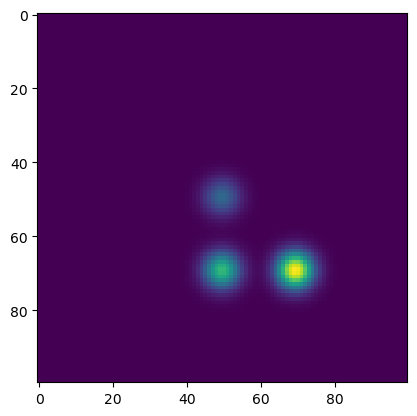

In [7]:
ts = np.linspace(-1, 1, 100)
x1 = np.exp(-ts**2/(0.1**2))
ts -= 0.4
x2 = np.exp(-ts**2/(0.1**2))
scalar = x1[None, :]*x1[:, None] + 2*x1[None, :]*x2[:, None] + 3*x2[None, :]*x2[:, None]
plt.imshow(scalar)
plt.show()

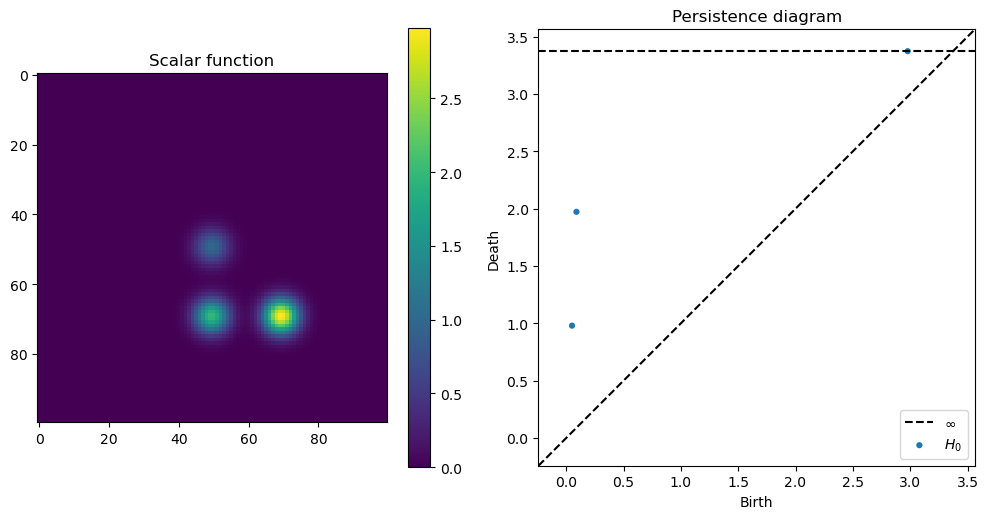

In [8]:
dgm = lower_star_img(-scalar)
dgm[~np.isinf(dgm)] = -dgm[~np.isinf(dgm)]
dgm[~np.isinf(dgm).any(axis=1)] = np.flip(dgm[~np.isinf(dgm).any(axis=1)])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(scalar)
plt.colorbar()
plt.title("Scalar function")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("Persistence diagram")
plt.tight_layout()
plt.show()

### 311 noise complaints example

In [12]:
df = pd.read_csv('data/0.1.csv')
df.head()

,origId,iceLabel,d,T,Points:0,Points:1,Points:2,cluster,nodeCluster
0,1525,1,0.00001,238.67,4.6209,0.101700,-0.000004,3,3
1,1525,1,0.00001,238.67,4.6209,0.100156,0.017656,3,3
2,1525,1,0.00001,238.67,4.6209,0.095568,0.034779,3,3
3,1525,1,0.00001,238.67,4.6209,0.088077,0.050846,3,3
4,1525,1,0.00001,238.67,4.6209,0.077909,0.065368,3,3


In [13]:
m1 = df[['Points:0','Points:1']].to_numpy()[:,1]
m2 = df[['Points:0','Points:1']].to_numpy()[:,0]
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

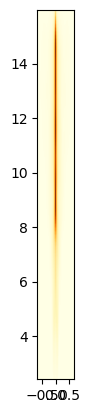

In [14]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.YlOrBr, extent=[xmin, xmax, ymin, ymax])
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

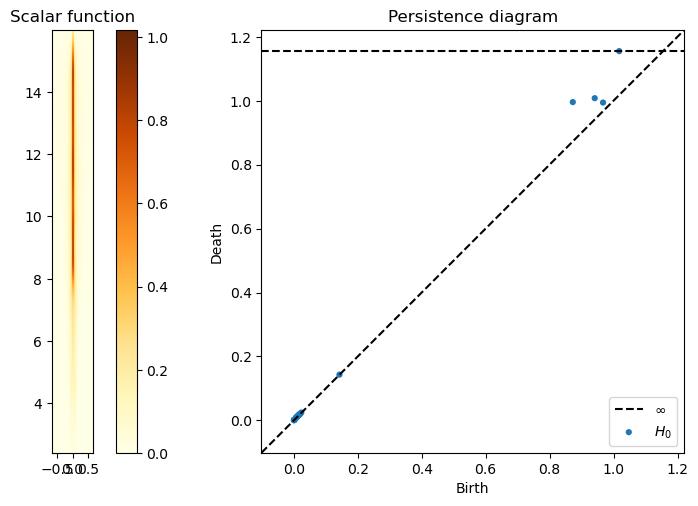

In [15]:
dgm = lower_star_img(-Z)
dgm[~np.isinf(dgm)] = -dgm[~np.isinf(dgm)]
dgm[~np.isinf(dgm).any(axis=1)] = np.flip(dgm[~np.isinf(dgm).any(axis=1)])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.rot90(Z), cmap=plt.cm.YlOrBr, extent=[xmin, xmax, ymin, ymax])
plt.colorbar()
plt.title("Scalar function")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("Persistence diagram")
plt.tight_layout()
plt.show()